In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import numpy as np
import re

In [2]:
permits = pd.read_csv('../data/Residential_Short_Term_Rental_Permits.csv')
permits

,Permit #,Applicant,Contact,Permit Subtype Description,Permit Status,Parcel,Date Entered,Date Issued,Expiration Date,Address,...,Permit Owner Addr. 2,Permit Owner Addr. 3,Permit Owner City,Permit Owner State,Permit Owner ZIP,Permit Type,Permit Subtype,Council District,Census Tract,Mapped Location
0,201622784,"Market Street Emporium, Llc",Market Street,Short Term Rental � Multifamily,EXPIRED,9306208400,5/16/2016 0:00,6/16/2016 0:00,6/16/2022 0:00,112 2ND AVE N 102,...,112 2ND AVE N 3RD FL,NaN,NASHVILLE,TN,37201,CASR,CAZ10A003,19.0,37019500,"112 2ND AVE N 102\nNASHVILLE, TN 37201\n(36.16..."
1,201530645,"Young, Christopher A. & Daniella C.","Young, Christopher A. & Daniella C.",Short Term Rental - Owner Occupied,EXPIRED,7310000200,7/21/2015 0:00,7/21/2015 0:00,7/21/2022 0:00,2610 SHADOW LN,...,2610 SHADOW LN,NaN,NASHVILLE,TN,37216,CASR,CAZ10A001,7.0,37011500,"2610 SHADOW LN\nNASHVILLE, TN 37216\n(36.20303..."
2,201526852,"Sinclair, Constance A.","Sinclair, Constance A.",Short Term Rental - Owner Occupied,ISSUED,9402015700,6/26/2015 0:00,6/26/2015 0:00,6/26/2023 0:00,1909 LONG AVE,...,1909 LONG AVE,NaN,NASHVILLE,TN,37203,CASR,CAZ10A001,6.0,37012200,"1909 LONG AVE\nNASHVILLE, TN 37206\n(36.168897..."
3,201622787,"Market Street Emporium, Llc",Market Street,Short Term Rental � Multifamily,EXPIRED,9306208400,5/16/2016 0:00,6/16/2016 0:00,6/16/2022 0:00,112 2ND AVE N 104,...,112 2ND AVE N 3RD FL,NaN,NASHVILLE,TN,37201,CASR,CAZ10A003,19.0,37019500,"112 2ND AVE N 104\nNASHVILLE, TN 37201\n(36.16..."
4,201532188,"Patterson, Travis & Michelle & Stephens, Gary",Michelle Patterson,Short Term Rental - Non-Owner Occupied,ISSUED,8313053700,7/30/2015 0:00,7/30/2015 0:00,7/30/2023 0:00,1105 LILLIAN ST,...,1105 LILLIAN ST,NaN,NASHVILLE,TN,37206,CASR,CAZ10A002,6.0,37019200,"1105 LILLIAN ST\nNASHVILLE, TN 37206\n(36.1733..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13274,2016024099,brenda hernandez,joseph ojibway,Short Term Rental - Owner Occupied,EXPIRED,16106022700,5/23/2016 0:00,12/12/2016 0:00,12/12/2019 0:00,5173 WHITAKER DR,...,5173 WHITAKER DR,NaN,NASHVILLE,TN,37211,CASR,CAZ10A001,27.0,37019106,"5173 WHITAKER DR\nNASHVILLE, TN 37211\n(36.050..."
13275,2018039628,"Faulkner Holding Group, LLC","Faulkner Holding Group, LLC",Short Term Rental � Multifamily,CANCELLED,105050Z01500CO,7/9/2018 0:00,7/11/2018 0:00,7/11/2022 0:00,1432 12TH AVE S,...,1950 Gough St. Apt. 206,NaN,San Francisco,CA,94109,CASR,CAZ10A003,17.0,37016200,"1432 12TH AVE S\nNASHVILLE, TN 37203\n(36.1375..."
13276,2017053599,"WESSON, PATRICIA HAWKINS",Patricia Hawkins,Short Term Rental - Owner Occupied,EXPIRED,108040A02000CO,8/15/2017 0:00,8/16/2017 0:00,8/16/2019 0:00,608 KENNINGTON S,...,608 KENNINGTON S,NaN,NASHVILLE,TN,37214,CASR,CAZ10A001,13.0,37015624,"608 KENNINGTON S\nNASHVILLE, TN 37214\n(36.146..."
13277,2018074272,"Niido Nashville, LLC","BOP Nest Nashville, LLC",Short Term Rental � Multifamily,ISSUED,9310023500,11/27/2018 0:00,12/26/2018 0:00,12/26/2022 0:00,501 REP JOHN LEWIS WAY S 325,...,NaN,NaN,MIAMI,FL,33131,CASR,CAZ10A003,19.0,37019500,"501 REP JOHN LEWIS WAY S 325\nNASHVILLE, TN 37203"


In [3]:
permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13279 entries, 0 to 13278
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    13279 non-null  object 
 1   Applicant                   13273 non-null  object 
 2   Contact                     12888 non-null  object 
 3   Permit Subtype Description  13279 non-null  object 
 4   Permit Status               13279 non-null  object 
 5   Parcel                      13279 non-null  object 
 6   Date Entered                13279 non-null  object 
 7   Date Issued                 11870 non-null  object 
 8   Expiration Date             13275 non-null  object 
 9   Address                     13279 non-null  object 
 10  City                        13278 non-null  object 
 11  State                       13278 non-null  object 
 12  ZIP                         13279 non-null  int64  
 13  Subdivision / Lot           132

In [4]:
permits['ZIP'] = permits['ZIP'].apply(str)
permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13279 entries, 0 to 13278
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    13279 non-null  object 
 1   Applicant                   13273 non-null  object 
 2   Contact                     12888 non-null  object 
 3   Permit Subtype Description  13279 non-null  object 
 4   Permit Status               13279 non-null  object 
 5   Parcel                      13279 non-null  object 
 6   Date Entered                13279 non-null  object 
 7   Date Issued                 11870 non-null  object 
 8   Expiration Date             13275 non-null  object 
 9   Address                     13279 non-null  object 
 10  City                        13278 non-null  object 
 11  State                       13278 non-null  object 
 12  ZIP                         13279 non-null  object 
 13  Subdivision / Lot           132

In [45]:
permits.value_counts('Date Issued')

Date Issued
12/26/2018 0:00    128
12/20/2018 0:00    126
5/23/2022 0:00      77
4/15/2022 0:00      75
12/15/2017 0:00     61
                  ... 
3/15/2016 0:00       1
8/8/2017 0:00        1
6/17/2020 0:00       1
10/13/2015 0:00      1
8/20/2020 0:00       1
Length: 1760, dtype: int64

In [5]:
permits.value_counts('ZIP').head(15)

ZIP
37203    2622
37206    1625
37208    1159
37212    1159
37207    1065
37209     971
37216     783
37201     581
37210     571
37204     458
37219     396
37211     395
37214     343
37205     184
37115     163
dtype: int64

In [6]:
permits.value_counts('Permit Status')

Permit Status
ISSUED       5953
EXPIRED      5806
CANCELLED    1296
PENDING       203
HOLD           11
REVOKED         7
EXPIREEXT       2
REFUNDED        1
dtype: int64

In [7]:
permits.value_counts('Applicant').head(20)

Applicant
Niido Nashville, LLC             339
SIXTH SOUTH PARTNERS, LP         169
kenny mccullum                   125
TBR-L VILLAGE 21 OWNER LLC        78
VIBE AT MARATHON VILLAGE, LLC     72
marshall burridge                 69
LEE APTS, LLC                     59
jennifer mitchell                 55
NIC Velocity, LLC                 53
205 D OWNER, LLC                  51
Mint House                        51
1600 MCG OWNER, LLC               50
The Lease Killers                 46
Turnkey Vacation Rentals          44
Denise Vandersall                 38
Robert Lowe                       38
David Shearon                     30
Brock Hartline                    30
The Trio Music Row, LLC           30
Hill Center Acklen,LLC            30
dtype: int64

In [8]:
permits.value_counts('Permit Owner ZIP').head()

Permit Owner ZIP
37206    1329
37203     921
37215     692
37216     636
37207     634
dtype: int64

In [9]:
permits.value_counts('Permit Owner City').head()

Permit Owner City
NASHVILLE        7497
Nashville        1456
MIAMI             344
BRENTWOOD         237
San Francisco     165
dtype: int64

In [10]:
permits['Permit Owner City'] = permits['Permit Owner City'].str.lower()

In [11]:
permits['Permit Owner State'] = permits['Permit Owner State'].str.upper()

In [12]:
permit_city = permits.value_counts('Permit Owner City')

In [13]:
permit_city

Permit Owner City
nashville     8958
miami          344
brentwood      313
franklin       216
madison        168
              ... 
islamorada       1
irvine           1
iowa city        1
inglewood        1
zionsville       1
Length: 555, dtype: int64

In [14]:
#permit_city['Permit Owner City'].value_counts(normalize=True) * 100

In [15]:
permit_owners_cities = permit_city.to_frame().reset_index()
permit_owners_cities.head(8)

,Permit Owner City,0
0,nashville,8958
1,miami,344
2,brentwood,313
3,franklin,216
4,madison,168
5,san francisco,166
6,atlanta,154
7,new york,128


In [16]:
permits_owner_location = permits[['Applicant', 'Permit Owner City', 'Permit Owner State', 'Permit Owner ZIP']]
permit_owners_location = permits_owner_location.value_counts().to_frame().reset_index()

In [17]:
permit_owners_location.columns = ['Applicant', 'Permit Owner City', 'Permit Owner State', 'Permit Owner ZIP', 'Count of Permits']

In [76]:
permit_owners_location.head(20)

,Applicant,Permit Owner City,Permit Owner State,Permit Owner ZIP,Count of Permits
0,"Niido Nashville, LLC",miami,FL,33131,339
1,"SIXTH SOUTH PARTNERS, LP",san francisco,CA,94111,164
2,kenny mccullum,nashville,TN,37219,124
3,TBR-L VILLAGE 21 OWNER LLC,atlanta,GA,30303,78
4,"VIBE AT MARATHON VILLAGE, LLC",nashville,TN,37215,68
5,"LEE APTS, LLC",nashville,TN,37215,59
6,"NIC Velocity, LLC",nashville,TN,37203,53
7,"205 D OWNER, LLC",washington,DC,20002,51
8,"1600 MCG OWNER, LLC",washington,DC,20002,50
9,Robert Lowe,nashville,TN,37202,38


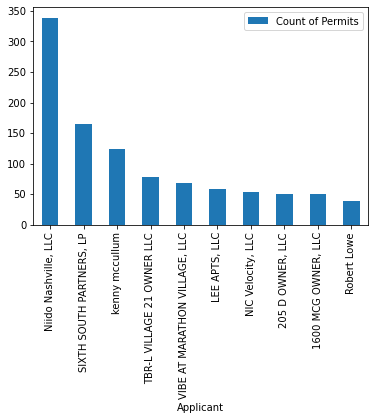

In [55]:
permit_owner_location_graph = permit_owners_location.head(10).plot.bar(x='Applicant', y='Count of Permits')

In [57]:
permit_cities = permit_owners_location.value_counts('Permit Owner City')
permit_cities

Permit Owner City
nashville      6830
brentwood       236
franklin        174
madison         151
antioch          95
               ... 
irvine            1
iowa city         1
inglewood         1
idaho falls       1
zionsville        1
Length: 552, dtype: int64

In [62]:
permit_cities = permit_cities.drop('nashville')

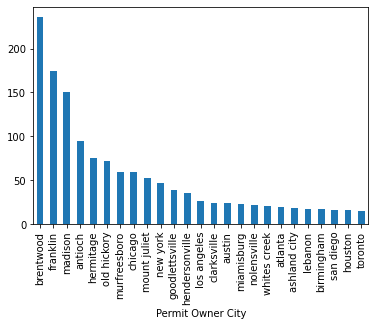

In [75]:
permit_owner_cities_graph = permit_cities.head(25).plot.bar(x='Permit Owner City', y='Count')
ylabel= 'Count of Permit Owners'

In [20]:
permit_owners_location.value_counts('Permit Owner ZIP')

Permit Owner ZIP
37206     1213
37216      602
37207      602
37209      544
37203      534
          ... 
45231        1
46032        1
46077        1
46112        1
T5L3W9       1
Length: 836, dtype: int64

In [21]:
permit_owners_location.value_counts('Permit Owner City').sum()

9326

### 2,487 (27.4%) permits are owned by people/companies that live in cities outside of nashville

In [22]:
permit_owners_location.value_counts('Permit Owner State') 

Permit Owner State
TN    8139
CA     279
TX      96
IL      95
NY      83
GA      54
FL      53
OH      45
KY      41
CO      36
IN      31
AZ      26
MA      26
AL      26
NC      23
MI      22
ON      17
PA      17
MO      16
IA      16
LA      15
WA      15
NJ      13
VA      13
CT      13
UT      11
WI      11
NV      10
MD       8
SC       8
MS       7
WY       6
OR       5
DC       5
ID       4
NE       4
OK       4
AR       4
MN       4
KS       4
UN       3
DE       3
NM       3
SD       3
HI       2
NH       2
MT       2
HR       1
WV       1
AB       1
dtype: int64

#13% are out of TN

In [23]:
permit_owners_location['Permit Owner State'].value_counts(normalize=True) * 100

TN    87.272142
CA     2.991636
TX     1.029380
IL     1.018658
NY     0.889985
GA     0.579026
FL     0.568304
OH     0.482522
KY     0.439631
CO     0.386018
IN     0.332404
AZ     0.278790
MA     0.278790
AL     0.278790
NC     0.246622
MI     0.235900
ON     0.182286
PA     0.182286
MO     0.171563
IA     0.171563
LA     0.160841
WA     0.160841
VA     0.139395
CT     0.139395
NJ     0.139395
UT     0.117950
WI     0.117950
NV     0.107227
SC     0.085782
MD     0.085782
MS     0.075059
WY     0.064336
OR     0.053614
DC     0.053614
NE     0.042891
AR     0.042891
OK     0.042891
MN     0.042891
ID     0.042891
KS     0.042891
SD     0.032168
DE     0.032168
NM     0.032168
UN     0.032168
NH     0.021445
MT     0.021445
HI     0.021445
AB     0.010723
WV     0.010723
HR     0.010723
Name: Permit Owner State, dtype: float64

In [24]:
council_district = permits.value_counts('Council District')

In [25]:
council_district

Council District
19.0    3451
17.0    1488
21.0    1396
5.0     1333
6.0     1107
18.0     649
7.0      590
20.0     404
2.0      383
24.0     369
8.0      316
15.0     266
16.0     258
25.0     154
13.0     119
26.0     114
14.0      81
3.0       79
1.0       71
11.0      66
27.0      66
29.0      55
30.0      54
35.0      52
9.0       49
23.0      47
4.0       45
12.0      36
22.0      31
34.0      31
28.0      29
10.0      24
31.0      24
33.0      23
32.0      12
dtype: int64

In [26]:
zip = permits.value_counts('ZIP')
zip

ZIP
37203    2622
37206    1625
37208    1159
37212    1159
37207    1065
37209     971
37216     783
37201     581
37210     571
37204     458
37219     396
37211     395
37214     343
37205     184
37115     163
37217     139
37215     127
37218      87
37013      83
37221      71
37076      69
37138      60
37228      35
37072      29
37220      29
37189      26
37027      24
37080      11
37143       7
37064       2
37213       1
37135       1
37122       1
37015       1
0           1
dtype: int64

In [27]:
permit_subtype = permits.value_counts('Permit Subtype').to_frame().reset_index()
permit_subtype

,Permit Subtype,0
0,CAZ10A003,6651
1,CAZ10A001,4835
2,CAZ10A002,1793


In [28]:
#01 = Owner Occupied
#02 =  Non-owner occupied
#03 = Multifamily

In [29]:
permits_slice = permits[['Permit Subtype', 'Permit Status', 'Date Issued', 'Expiration Date']]
permits_slice.head()

,Permit Subtype,Permit Status,Date Issued,Expiration Date
0,CAZ10A003,EXPIRED,6/16/2016 0:00,6/16/2022 0:00
1,CAZ10A001,EXPIRED,7/21/2015 0:00,7/21/2022 0:00
2,CAZ10A001,ISSUED,6/26/2015 0:00,6/26/2023 0:00
3,CAZ10A003,EXPIRED,6/16/2016 0:00,6/16/2022 0:00
4,CAZ10A002,ISSUED,7/30/2015 0:00,7/30/2023 0:00


In [30]:
permits_sliced = permits_slice[['Permit Subtype', 'Permit Status']].value_counts()
permits_sliced

Permit Subtype  Permit Status
CAZ10A003       ISSUED           3481
CAZ10A001       EXPIRED          2457
CAZ10A003       EXPIRED          2245
CAZ10A001       ISSUED           1998
CAZ10A002       EXPIRED          1104
CAZ10A003       CANCELLED         725
CAZ10A002       ISSUED            474
CAZ10A001       CANCELLED         359
CAZ10A002       CANCELLED         212
CAZ10A003       PENDING           193
CAZ10A001       PENDING            10
                HOLD                5
CAZ10A003       HOLD                5
CAZ10A001       REVOKED             4
CAZ10A002       REVOKED             2
CAZ10A001       EXPIREEXT           2
CAZ10A003       REFUNDED            1
CAZ10A002       HOLD                1
CAZ10A003       REVOKED             1
dtype: int64

In [31]:
sliced_permits = permits_sliced.to_frame().reset_index()
sliced_permits

,Permit Subtype,Permit Status,0
0,CAZ10A003,ISSUED,3481
1,CAZ10A001,EXPIRED,2457
2,CAZ10A003,EXPIRED,2245
3,CAZ10A001,ISSUED,1998
4,CAZ10A002,EXPIRED,1104
5,CAZ10A003,CANCELLED,725
6,CAZ10A002,ISSUED,474
7,CAZ10A001,CANCELLED,359
8,CAZ10A002,CANCELLED,212
9,CAZ10A003,PENDING,193


In [32]:
sliced_permits.columns = ['Permit Subtype', 'Permit Status', 'Count of Permits']
sliced_permits

,Permit Subtype,Permit Status,Count of Permits
0,CAZ10A003,ISSUED,3481
1,CAZ10A001,EXPIRED,2457
2,CAZ10A003,EXPIRED,2245
3,CAZ10A001,ISSUED,1998
4,CAZ10A002,EXPIRED,1104
5,CAZ10A003,CANCELLED,725
6,CAZ10A002,ISSUED,474
7,CAZ10A001,CANCELLED,359
8,CAZ10A002,CANCELLED,212
9,CAZ10A003,PENDING,193


In [33]:
sliced_permits.sort_values('Permit Subtype')

,Permit Subtype,Permit Status,Count of Permits
1,CAZ10A001,EXPIRED,2457
3,CAZ10A001,ISSUED,1998
15,CAZ10A001,EXPIREEXT,2
7,CAZ10A001,CANCELLED,359
10,CAZ10A001,PENDING,10
11,CAZ10A001,HOLD,5
13,CAZ10A001,REVOKED,4
4,CAZ10A002,EXPIRED,1104
6,CAZ10A002,ISSUED,474
8,CAZ10A002,CANCELLED,212


In [34]:
#01 = Owner Occupied
#02 =  Non-owner occupied
#03 = Multifamily

In [77]:
permits_zip = permits[['Applicant', 'ZIP', 'Permit Owner ZIP', 'Permit Owner City']]
permits_zip

,Applicant,ZIP,Permit Owner ZIP,Permit Owner City
0,"Market Street Emporium, Llc",37201,37201,nashville
1,"Young, Christopher A. & Daniella C.",37216,37216,nashville
2,"Sinclair, Constance A.",37206,37203,nashville
3,"Market Street Emporium, Llc",37201,37201,nashville
4,"Patterson, Travis & Michelle & Stephens, Gary",37206,37206,nashville
...,...,...,...,...
13274,brenda hernandez,37211,37211,nashville
13275,"Faulkner Holding Group, LLC",37203,94109,san francisco
13276,"WESSON, PATRICIA HAWKINS",37214,37214,nashville
13277,"Niido Nashville, LLC",37203,33131,miami


In [78]:
outside_nash = permits_zip[permits_zip['ZIP']!=permits_zip['Permit Owner ZIP']]
outside_nash

,Applicant,ZIP,Permit Owner ZIP,Permit Owner City
2,"Sinclair, Constance A.",37206,37203,nashville
5,"BOWEN, ANDREW C.",37201,10017,new york
6,"STEINGER, JANIELLE LOUISE & MCGEE, MATTHEW JACOB",37203,95630,folsom
11,"WILEY, ROBERT G. & CAROLANN M.",37208,37067,franklin
12,"CONDON SNYDER, LLC",37206,55369,maple glove
...,...,...,...,...
13269,1441 Pike L.P.,37210,M4P 1E4,toronto
13271,"ST. JOSEPH PROPERTIES, LLC",37203,38017,collierville
13272,"CROSS, JORDAN & CARRIE",37212,78041,laredo
13275,"Faulkner Holding Group, LLC",37203,94109,san francisco


In [79]:
outside_nash.value_counts('Permit Owner ZIP')

Permit Owner ZIP
37215     585
33131     343
37205     338
37203     325
37204     273
         ... 
46227       1
46883       1
47553       1
48017       1
T5L3W9      1
Length: 837, dtype: int64

In [80]:
outside_nash = outside_nash.sort_values('Permit Owner ZIP').fillna(0)
outside_nash

,Applicant,ZIP,Permit Owner ZIP,Permit Owner City
1704,Grant Hosking,37207,10001,new york
4273,Mena Bishai,37216,10002,new york
4893,3808 Hutson LLC,37216,10002,new york
5066,1810 WEDGEWOOD LLC,37212,10003,new york
2614,"Atlas 360,LLC",37206,10008,new york
...,...,...,...,...
12016,STEPHANIE GOLLOBIN,37217,0,0
12115,brad bultemeier,37207,0,0
12719,jacqueline kennedy,37216,0,0
12969,SUNNY MEADOWS LP,37212,0,0


In [81]:
zip_count = outside_nash.value_counts()
zip_count

Applicant                           ZIP    Permit Owner ZIP  Permit Owner City
Niido Nashville, LLC                37203  33131             miami                339
SIXTH SOUTH PARTNERS, LP            37203  94111             san francisco        164
TBR-L VILLAGE 21 OWNER LLC          37212  30303             atlanta               78
VIBE AT MARATHON VILLAGE, LLC       37208  37215             nashville             68
LEE APTS, LLC                       37203  37215             nashville             59
                                                                                 ... 
GOMEZ, DAVID TODD & KIMBERLY MARIE  37203  91390             santa clarita          1
GOMEZ, MICHAEL                      37210  37179             thompsons station      1
GOOD HOME TRAVEL LLC                37212  37215             nashville              1
GOODHEART, GREG & DENISE            37201  37027             brentwood              1
KALI TURNER                         37206  37203             

In [82]:
zip_count.to_frame()

,,,,0
Applicant,ZIP,Permit Owner ZIP,Permit Owner City,
"Niido Nashville, LLC",37203,33131,miami,339
"SIXTH SOUTH PARTNERS, LP",37203,94111,san francisco,164
TBR-L VILLAGE 21 OWNER LLC,37212,30303,atlanta,78
"VIBE AT MARATHON VILLAGE, LLC",37208,37215,nashville,68
"LEE APTS, LLC",37203,37215,nashville,59
...,...,...,...,...
"GOMEZ, DAVID TODD & KIMBERLY MARIE",37203,91390,santa clarita,1
"GOMEZ, MICHAEL",37210,37179,thompsons station,1
GOOD HOME TRAVEL LLC,37212,37215,nashville,1


In [83]:
zip_count = zip_count.reset_index()
zip_count

,Applicant,ZIP,Permit Owner ZIP,Permit Owner City,0
0,"Niido Nashville, LLC",37203,33131,miami,339
1,"SIXTH SOUTH PARTNERS, LP",37203,94111,san francisco,164
2,TBR-L VILLAGE 21 OWNER LLC,37212,30303,atlanta,78
3,"VIBE AT MARATHON VILLAGE, LLC",37208,37215,nashville,68
4,"LEE APTS, LLC",37203,37215,nashville,59
...,...,...,...,...,...
3579,"GOMEZ, DAVID TODD & KIMBERLY MARIE",37203,91390,santa clarita,1
3580,"GOMEZ, MICHAEL",37210,37179,thompsons station,1
3581,GOOD HOME TRAVEL LLC,37212,37215,nashville,1
3582,"GOODHEART, GREG & DENISE",37201,37027,brentwood,1


In [85]:
zip_count.columns = ['Applicant', 'Airbnb Zip', 'Permit Owner Zip', 'Permit Owner City', 'Count of Permits']
zip_count.head(20)

,Applicant,Airbnb Zip,Permit Owner Zip,Permit Owner City,Count of Permits
0,"Niido Nashville, LLC",37203,33131,miami,339
1,"SIXTH SOUTH PARTNERS, LP",37203,94111,san francisco,164
2,TBR-L VILLAGE 21 OWNER LLC,37212,30303,atlanta,78
3,"VIBE AT MARATHON VILLAGE, LLC",37208,37215,nashville,68
4,"LEE APTS, LLC",37203,37215,nashville,59
5,"205 D OWNER, LLC",37201,20002,washington,51
6,"1600 MCG OWNER, LLC",37203,20002,washington,50
7,Robert Lowe,37201,37202,nashville,38
8,marshall burridge,37203,37201,nashville,32
9,"The Trio Music Row, LLC",37212,37215,nashville,30


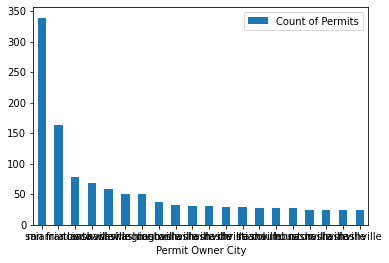

In [86]:
city_graph = zip_count.head(20).plot.bar(x='Permit Owner City', y='Count of Permits', rot=0)

In [87]:
zip_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Applicant          3584 non-null   object
 1   Airbnb Zip         3584 non-null   object
 2   Permit Owner Zip   3584 non-null   object
 3   Permit Owner City  3584 non-null   object
 4   Count of Permits   3584 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 140.1+ KB


In [ ]:
zip_count['Count of Permits'] = zip_count['Count of Permits'].apply(str)
zip_count

In [ ]:
zip_count.info()

In [ ]:
zip_count

In [ ]:
zip_count.sort_values('Count of Permits', ascending = False)

In [ ]:
zip_count.value_counts('Airbnb Zip')

In [ ]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

In [ ]:
zipcodes.info()

In [ ]:
permits.info()

In [ ]:
permits.head(1)

In [ ]:
geo = permits['Mapped Location'].str.extract('.*\((.*)\).*')

In [ ]:
permits_geo = permits.assign(Geo_Permit = geo)
permits_geo.head()

In [ ]:
permits_geo.info()

In [ ]:
#permits_geo["Geo_Permit"] = permits_geo.apply(lambda row: Point(row["Geo_Permit"]), axis=1)
#permits_geo

## Chris's Feedback - isolate lat and lon (); zipcodes notebook, geodata frame from geo column; geospatial merge to see the points in each zip

In [ ]:
from shapely import wkt
zipcodes['geometry'] = zipcodes.geometry.apply(lambda x: wkt.dumps(x))

In [ ]:
zipcodes.info()

In [ ]:
geo_zip = zipcodes['geometry'].str.extract('.*\((.*)\).*')

In [ ]:
geo_zip = zipcodes.assign(Geo_Zip = geo_zip)
geo_zip.head()

In [ ]:
#geo_zip.Geo_Zip = geo_zip.Geo_Zip.astype(point)